In [1]:
import os
os.environ['PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION' ] = 'python'

In [2]:
from lass.log_handling import LogLoaderArgs, LogLoader


args = LogLoaderArgs(
    logdir="../artifacts/logs",
    tasks="paper-full",
    model_families=["BIG-G T=0"],
    model_sizes=["128b"],
    # model_sizes=["2m"],
    shots=[0],
    # query_types=["multiple_choice"],
)
loader = LogLoader(args)

In [3]:
tasks = list(loader.load_per_task())

In [4]:
import bigbench.api.results as bb

In [5]:
def query_class_to_type(query):
    if query.__class__ == bb.MultipleChoiceQuery:
        return "multiple_choice"
    elif query.__class__ == bb.GenerativeQuery:
        return "generative"
    elif query.__class__ == bb.ScoringQuery:
        return "scoring"
    else:
        raise ValueError(f"Unknown query class: {query.__class__}")

### Count the number of tasks with queries of specific question types
The options are multiple choice, generative, and scoring.

In [6]:
from collections import defaultdict

task_types = defaultdict(list)
for task in tasks:
    run = task[list(task.keys())[0]]
    types = [query_class_to_type(query) for query in (run.queries or [])]
    for type_ in set(types):
        task_types[type_].append(run.task.task_name)

    if len(set(types)) > 1:
        task_types["mixed"].append(run.task.task_name)

{key: len(value) for key, value in task_types.items()}

# For 3-shot it's {'multiple_choice': 118, 'generative': 54, 'mixed': 54, 'scoring': 53}
# For 0-shot it's {'multiple_choice': 118, 'generative': 54, 'mixed': 54, 'scoring': 68}

{'multiple_choice': 118, 'generative': 54, 'mixed': 54, 'scoring': 68}

### Example Tasks

In [7]:
task_types["multiple_choice"][:10]

['abstract_narrative_understanding',
 'anachronisms',
 'analogical_similarity',
 'analytic_entailment',
 'arithmetic',
 'authorship_verification',
 'bbq_lite_json',
 'causal_judgment',
 'cause_and_effect',
 'checkmate_in_one']

In [8]:
task_types["generative"][:10]

['arithmetic',
 'ascii_word_recognition',
 'auto_categorization',
 'auto_debugging',
 'bridging_anaphora_resolution_barqa',
 'checkmate_in_one',
 'chess_state_tracking',
 'chinese_remainder_theorem',
 'codenames',
 'color']

In [9]:
task_types["scoring"][:10]

['ascii_word_recognition',
 'auto_categorization',
 'auto_debugging',
 'bbq_lite',
 'bias_from_probabilities',
 'boolean_expressions',
 'bridging_anaphora_resolution_barqa',
 'checkmate_in_one',
 'chess_state_tracking',
 'chinese_remainder_theorem']

In [10]:
task_types["mixed"][:10]

['arithmetic',
 'ascii_word_recognition',
 'auto_categorization',
 'auto_debugging',
 'bridging_anaphora_resolution_barqa',
 'checkmate_in_one',
 'chess_state_tracking',
 'chinese_remainder_theorem',
 'codenames',
 'color']

### Validate disjoint sets

In [11]:
generative_non_mpc = set(task_types["generative"]) - set(task_types["multiple_choice"])
generative_non_scoring = set(task_types["generative"]) - set(task_types["scoring"])
generative_only = set(task_types["generative"]) - set(task_types["mixed"])
scoring_non_generative = set(task_types["scoring"]) - set(task_types["generative"])
scoring_non_mpc = set(task_types["scoring"]) - set(task_types["multiple_choice"])
scoring_only = set(task_types["scoring"]) - set(task_types["mixed"])
mpc_only = set(task_types["multiple_choice"]) - set(task_types["mixed"])
all_tasks = set(task_types["multiple_choice"]) | set(task_types["generative"]) | set(task_types["scoring"])

All generative tasks are mixed tasks.

In [12]:
len(generative_only)

0

... and there is only one task that is generative, but not a scoring task.

In [13]:
print(len(generative_non_scoring), generative_non_scoring)

1 {'arithmetic'}


While there are multiple 'scoring' tasks that are not generative.

In [14]:
print(len(scoring_non_generative), sorted(list(scoring_non_generative)))
print(len(scoring_only), sorted(list(scoring_only)))
print(len(scoring_non_mpc), sorted(list(scoring_non_mpc)))

15 ['bbq_lite', 'bias_from_probabilities', 'boolean_expressions', 'com2sense', 'diverse_social_bias', 'dynamic_counting', 'factuality_of_summary', 'forecasting_subquestions', 'gender_sensitivity_chinese', 'gender_sensitivity_english', 'protein_interacting_sites', 'subject_verb_agreement', 'talkdown', 'unqover', 'web_of_lies']
15 ['bbq_lite', 'bias_from_probabilities', 'boolean_expressions', 'com2sense', 'diverse_social_bias', 'dynamic_counting', 'factuality_of_summary', 'forecasting_subquestions', 'gender_sensitivity_chinese', 'gender_sensitivity_english', 'protein_interacting_sites', 'subject_verb_agreement', 'talkdown', 'unqover', 'web_of_lies']
58 ['ascii_word_recognition', 'auto_categorization', 'auto_debugging', 'bbq_lite', 'bias_from_probabilities', 'boolean_expressions', 'bridging_anaphora_resolution_barqa', 'chess_state_tracking', 'chinese_remainder_theorem', 'codenames', 'com2sense', 'conlang_translation', 'cryptonite', 'disfl_qa', 'diverse_social_bias', 'dynamic_counting', 'f

...

In [15]:
print(len(generative_non_mpc), sorted(list(generative_non_mpc)))

43 ['ascii_word_recognition', 'auto_categorization', 'auto_debugging', 'bridging_anaphora_resolution_barqa', 'chess_state_tracking', 'chinese_remainder_theorem', 'codenames', 'conlang_translation', 'cryptonite', 'disfl_qa', 'few_shot_nlg', 'gem', 'gender_inclusive_sentences_german', 'hindi_question_answering', 'international_phonetic_alphabet_transliterate', 'language_games', 'linguistic_mappings', 'linguistics_puzzles', 'list_functions', 'matrixshapes', 'modified_arithmetic', 'mult_data_wrangling', 'natural_instructions', 'object_counting', 'operators', 'paragraph_segmentation', 'parsinlu_reading_comprehension', 'physics_questions', 'polish_sequence_labeling', 'qa_wikidata', 'repeat_copy_logic', 'rephrase', 'scientific_press_release', 'semantic_parsing_in_context_sparc', 'semantic_parsing_spider', 'simp_turing_concept', 'simple_text_editing', 'sufficient_information', 'tense', 'topical_chat', 'unnatural_in_context_learning', 'word_sorting', 'word_unscrambling']


In [16]:
# ascii_word_recognition: single word output, big discrete set
# auto_categorization: single word output, big discrete set
# auto_debugging: single word output, big discrete set
# bridging_anaphora: multiple word output, small set (from context)
# chess_state_tracking: multiple word output, small discrete set (64 options) (but arbitrary length)
# chinese_remainder_theorem: single word output, big discrete set
# codenames: single word output, big discrete set
# All QA or math?

# Metrics Used

In [29]:
def get_preferred_metrics(task_list):
    counts = {}
    for task in tasks:
        run = task[list(task.keys())[0]] # Wtf is this?
        if run.task.task_name not in task_list:
            continue
        pref_metrics = [score.preferred_score for score in run.scores]
        pref_metrics_unique = set(pref_metrics)
        for metric in pref_metrics_unique:
            counts[metric] = counts.get(metric, 0) + 1
    return dict(sorted(counts.items(), key=lambda item: item[1], reverse=True)) # Sort by count
print(get_preferred_metrics(generative_non_mpc))
print(get_preferred_metrics(scoring_non_mpc))
print(get_preferred_metrics(mpc_only))

{'exact_str_match': 28, 'normalized_aggregate_score': 11, 'bleu': 9, 'rougeLsum': 5, 'bleurt': 1, 'sequence_f1': 1, 'log_likelihood': 1}
{'exact_str_match': 28, 'normalized_aggregate_score': 19, 'bleu': 9, 'rougeLsum': 5, 'multiple_choice_grade': 4, 'gender_bias_score': 2, 'mean_accuracy': 2, 'gender_stereotype_score': 2, 'accuracy': 1, 'difference_score': 1, 'combined_bias': 1, 'pair-wise-accuracy': 1, 'overall gender bias': 1, 'avg_acc': 1, 'bleurt': 1, 'average_log_probability': 1, 'gender_minority_bias_score': 1, 'gender_minority_stereotype_score': 1, 'sequence_f1': 1, 'log_likelihood': 1, 'full': 1, 'macro_f1': 1, 'fairness': 1}
{'multiple_choice_grade': 106, 'macro_f1': 1}


# Performance Analysis

In [56]:
import matplotlib.pyplot as plt
import numpy as np

def plot_cumulative_performance(task_list, metrics: list):
    scores = {}
    for task in tasks:
        run = task[list(task.keys())[0]]

        # Filter out irrelevant tasks
        if run.task.task_name not in task_list:
            continue

        
        # Filter out tasks that don't have the metrics we're interested in
        pref_metrics = [score.preferred_score for score in run.scores]
        if len(list(filter(lambda m: m in metrics, pref_metrics))) == 0:
            continue

        avg_score = sum([score.score_dict[score.preferred_score] for score in run.scores]) / len(run.scores)
        scores[run.task.task_name] = avg_score

    # Reverse cumulative plot of performance, with x-axis being the score, and y-axis the number of tasks that have that score or better
    plt.hist(list(scores.values()), bins=list(range(0, 100, 1)), cumulative=-1, density=True)
    plt.xlim(0, 100)

    plt.xlabel("Score")
    plt.ylabel("# Tasks")

    # Format y-labels to display the number of tasks
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"({int(len(scores) * x)}) {x:0.2f}")) # type: ignore

    return scores

{'ascii_word_recognition': 0.68359375,
 'auto_debugging': 0.0,
 'bridging_anaphora_resolution_barqa': 4.359567901234568,
 'chess_state_tracking': 33.3578431372549,
 'chinese_remainder_theorem': 0.0,
 'cryptonite': 2.392578125,
 'disfl_qa': 4.638671875,
 'gender_inclusive_sentences_german': 0.125,
 'language_games': 5.320297109751446,
 'linguistic_mappings': 55.30484068627451,
 'linguistics_puzzles': 0.0,
 'list_functions': 14.431673052362752,
 'matrixshapes': 11.5966796875,
 'modified_arithmetic': 16.61764705882353,
 'mult_data_wrangling': 57.44410569105691,
 'object_counting': 15.225000000000001,
 'operators': 26.42857142857143,
 'paragraph_segmentation': 0.1953125,
 'parsinlu_reading_comprehension': 0.3861003861003861,
 'physics_questions': 2.0,
 'repeat_copy_logic': 7.8125,
 'simp_turing_concept': 41.00684261974584,
 'simple_text_editing': 0.0,
 'sufficient_information': 0.0,
 'tense': 1.486013986013986,
 'unnatural_in_context_learning': 40.0634765625,
 'word_sorting': 22.607421875,

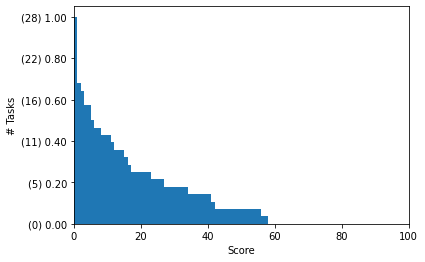

In [58]:
plot_cumulative_performance(scoring_non_mpc, ["exact_str_match"])

{'auto_categorization': 7.887318132355819,
 'codenames': 12.217234934787413,
 'hindi_question_answering': 0.030753416396654548,
 'international_phonetic_alphabet_transliterate': 22.736446217619118,
 'language_games': 5.320297109751446,
 'scientific_press_release': 1.4452303780248452,
 'semantic_parsing_in_context_sparc': 0.840750565351459,
 'semantic_parsing_spider': 0.650200245600175,
 'topical_chat': 0.7545351826286626}

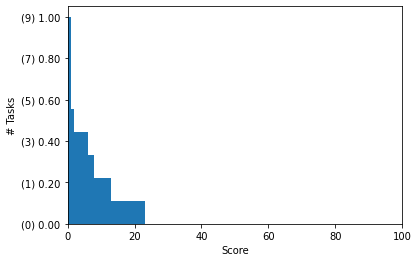

In [59]:
plot_cumulative_performance(scoring_non_mpc, ["bleu"])

{'bbq_lite': 0.7721740667944329,
 'bias_from_probabilities': 24.304171832937314,
 'chess_state_tracking': 33.3578431372549,
 'conlang_translation': 41.52266469049388,
 'diverse_social_bias': 39.45966217779271,
 'factuality_of_summary': 25.527522522522524,
 'gem': 27.32122824408064,
 'gender_sensitivity_chinese': 18.89200395356232,
 'gender_sensitivity_english': 10.45062951479481,
 'language_games': 5.320297109751446,
 'linguistic_mappings': 55.30484068627451,
 'list_functions': 14.431673052362752,
 'modified_arithmetic': 16.61764705882353,
 'mult_data_wrangling': 57.44410569105691,
 'natural_instructions': 26.579334571116178,
 'simp_turing_concept': 41.00684261974584,
 'subject_verb_agreement': 30.005108261201766,
 'unnatural_in_context_learning': 40.0634765625,
 'unqover': 15.992785987277959}

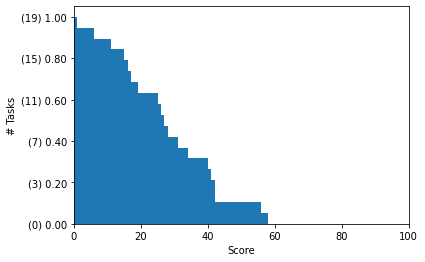

In [60]:
plot_cumulative_performance(scoring_non_mpc, ["normalized_aggregate_score"])

{'abstract_narrative_understanding': 34.164222873900286,
 'anachronisms': 51.52173913043478,
 'analogical_similarity': 18.188854489164086,
 'analytic_entailment': 46.07142857142857,
 'authorship_verification': 50.3409090909091,
 'bbq_lite_json': 56.37400793650795,
 'causal_judgment': 51.8421052631579,
 'cause_and_effect': 69.28104575163398,
 'cifar10_classification': 10.107421875,
 'code_line_description': 30.0,
 'color': 9.033203125,
 'common_morpheme': 39.0,
 'conceptual_combinations': 37.38756613756614,
 'crash_blossom': 42.10526315789473,
 'crass_ai': 22.727272727272727,
 'cryobiology_spanish': 59.76027397260273,
 'cs_algorithms': 33.5302734375,
 'dark_humor_detection': 54.375,
 'date_understanding': 55.96205962059621,
 'disambiguation_qa': 35.56201550387597,
 'discourse_marker_prediction': 11.843640606767796,
 'dyck_languages': 18.475,
 'elementary_math_qa': 21.1764705882353,
 'emoji_movie': 36.0,
 'emojis_emotion_prediction': 45.21946564885497,
 'empirical_judgments': 43.18181818

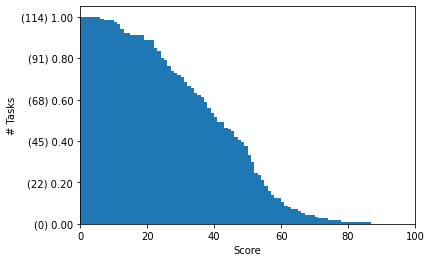

In [61]:
plot_cumulative_performance(set(task_types["multiple_choice"]), ["multiple_choice_grade"])
